In [2]:
import pandas as pd
from statsbombpy import sb
from tqdm import tqdm

In [3]:
sb.competitions()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [4]:
sb.matches(competition_id=2, season_id=27)
matches = sb.matches(competition_id=2, season_id=27)
matches.head()


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754058,2016-01-02,16:00:00.000,England - Premier League,2015/2016,Leicester City,AFC Bournemouth,0,0,available,...,2021-06-12T16:17:31.694,20,Regular Season,King Power Stadium,Andre Marriner,Claudio Ranieri,Eddie Howe,1.1.0,2,2
1,3754245,2015-10-17,16:00:00.000,England - Premier League,2015/2016,West Bromwich Albion,Sunderland,1,0,available,...,2021-06-13T16:17:31.694,9,Regular Season,The Hawthorns,Martin Atkinson,Tony Pulis,Sam Allardyce,1.1.0,2,2
2,3754136,2015-12-19,18:30:00.000,England - Premier League,2015/2016,Newcastle United,Aston Villa,1,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,St. James'' Park,Martin Atkinson,Steve McClaren,Rémi Garde,1.1.0,2,2
3,3754037,2016-04-30,16:00:00.000,England - Premier League,2015/2016,Everton,AFC Bournemouth,2,1,available,...,2021-06-12T16:17:31.694,36,Regular Season,Goodison Park,Neil Swarbrick,Roberto Martínez Montoliú,Eddie Howe,1.1.0,2,2
4,3754039,2016-02-13,16:00:00.000,England - Premier League,2015/2016,Crystal Palace,Watford,1,2,available,...,2021-06-12T16:17:31.694,26,Regular Season,Selhurst Park,Robert Madley,Alan Pardew,Enrique Sánchez Flores,1.1.0,2,2


In [5]:
all_events = []

for match_id in tqdm(matches['match_id']):
    try:
        events = sb.events(match_id=match_id)
        events['match_id'] = match_id  # keep track
        all_events.append(events)
    except Exception as e:
        print(f"Error loading match {match_id}: {e}")


  0%|          | 0/380 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
  0%|          | 1/380 [00:00<03:29,  1.81it/s]/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
  1%|          | 2/380 [00:01<03:10,  1.99it/s]/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
  1%|          | 3/380 [00:01<03:14,  1.94it/s]/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
  1%|          | 4/380 [00:02<03:24,  1.

In [6]:
pl_2016 = pd.concat(all_events, ignore_index=True)


In [7]:
print(pl_2016.columns.tolist())

['ball_receipt_outcome', 'ball_recovery_recovery_failure', 'carry_end_location', 'clearance_aerial_won', 'clearance_body_part', 'clearance_head', 'clearance_left_foot', 'clearance_right_foot', 'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage', 'foul_committed_card', 'foul_committed_offensive', 'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_punched_out', 'goalkeeper_technique', 'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location', 'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_deflected', 'pass_end_location', 'pass_height', 'pass_inswinging', 'pass_length', 'pass_outcome', 'pass_o

In [8]:
pl_2016.groupby('player')

In [9]:
# Basic event filtering
passes = pl_2016[pl_2016['type'] == 'Pass'].groupby('player').size().rename('passes')
completed_passes = pl_2016[(pl_2016['type'] == 'Pass') & (pl_2016['pass_outcome'].isna())].groupby('player').size().rename('completed_passes')
shots = pl_2016[pl_2016['type'] == 'Shot'].groupby('player').size().rename('shots')
xg = pl_2016[pl_2016['type'] == 'Shot'].groupby('player')['shot_statsbomb_xg'].sum().rename('xG')
xg = round(xg, 2)
carries = pl_2016[pl_2016['type'] == 'Carry'].groupby('player').size().rename('carries')
assists_for_shots = (
    pl_2016[(pl_2016['type'] == 'Pass') & (pl_2016['pass_shot_assist'].notna())]
    .groupby('player')
    .size()
    .rename('assists_for_shots')
)

assists_for_goals = (
    pl_2016[(pl_2016['type'] == 'Pass') & (pl_2016['pass_goal_assist'].notna())]
    .groupby('player')
    .size()
    .rename('assists_for_goals')
)

through_balls = (
    pl_2016[(pl_2016['type'] == 'Pass') & (pl_2016['pass_through_ball'].notna())]
    .groupby('player')
    .size()
    .rename('through_balls')
)
duels_won = (
    pl_2016[
        (pl_2016['type'] == 'Duel') &
        ((pl_2016['duel_outcome'] == 'Won') | (pl_2016['duel_outcome'] == 'Success In Play'))
    ]
    .groupby('player')
    .size()
    .rename('duels_won')
)

interceptions = (
    pl_2016[
        (pl_2016['type'] == 'Interception') &
        ((pl_2016['interception_outcome'].notna()) & (pl_2016['interception_outcome'] != 'Lost In Play'))
    ]
    .groupby('player')
    .size()
    .rename('interceptions')
)

counterpresses = (
    pl_2016[pl_2016['counterpress'] == True]
    .groupby('player')
    .size()
    .rename('counterpresses')
)

all_dribbles = (
    pl_2016[(pl_2016['type'] == 'Dribble') & (pl_2016['dribble_outcome'].notna())]
    .groupby('player')
    .size()
    .rename('all_dribbles')
)

successful_dribbles = (
    pl_2016[
        (pl_2016['type'] == 'Dribble') &
        (pl_2016['dribble_outcome'] == 'Complete')
    ]
    .groupby('player')
    .size()
    .rename('successful_dribbles')
)

header_headers = (
    pl_2016[
        (pl_2016['type'] == 'Shot') &
        (pl_2016['shot_body_part'] == 'Head')
    ]
    .groupby('player')
    .size()
    .rename('headers')
)

clearances = (
    pl_2016[pl_2016['clearance_body_part'].notna()]
    .groupby('player')
    .size()
    .rename('clearances')
)


crosses = (
    pl_2016[pl_2016['pass_cross'].notna()]
    .groupby('player')
    .size()
    .rename('crosses')
)

cut_backs = (
    pl_2016[pl_2016['pass_cut_back'].notna()]
    .groupby('player')
    .size()
    .rename('cut_backs')
)

positions = (
    pl_2016[pl_2016['position'].notna()]
    .groupby('player')['position']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .rename('position')
)



#adding minutes played
# Get substitutions only
subs = pl_2016[pl_2016['type'] == 'Substitution']

# Players subbed OFF
subbed_off = subs[['match_id', 'player', 'minute']].copy()
subbed_off['minutes_played'] = subbed_off['minute']  # played until subbed

# Players subbed ON
subbed_on = subs[['match_id', 'substitution_replacement', 'minute']].copy()
subbed_on.columns = ['match_id', 'player', 'minute']
subbed_on['minutes_played'] = 90 - subbed_on['minute']  # played from sub time to 90

# Concatenate subbed on + subbed off
sub_minutes = pd.concat([subbed_off, subbed_on])

# Other players (not subbed)
all_players = pl_2016[['match_id', 'player']].dropna().drop_duplicates()
sub_players = sub_minutes[['match_id', 'player']]
full_90_players = pd.merge(all_players, sub_players, on=['match_id', 'player'], how='left', indicator=True)
full_90_players = full_90_players[full_90_players['_merge'] == 'left_only'][['match_id', 'player']]
full_90_players['minutes_played'] = 90

# Combine everything
minutes_df = pd.concat([sub_minutes[['match_id', 'player', 'minutes_played']], full_90_players])

# Sum minutes across all matches per player
minutes_per_player = minutes_df.groupby('player')['minutes_played'].sum().rename('minutes')



full_nineties = round(minutes_per_player / 90, 1).rename('full_nineties')

pass_accuracy = round(completed_passes / passes * 100, 1).rename('pass_accuracy %')

# Merge all into a single DataFrame
newdf = pd.concat([passes, shots, xg, carries, assists_for_shots, through_balls, minutes_per_player, full_nineties, pass_accuracy, duels_won, interceptions, counterpresses, assists_for_goals, all_dribbles, successful_dribbles, header_headers, clearances, crosses, cut_backs, positions], axis=1).fillna(0)

# Convert to integers where appropriate
for col in ['passes', 'shots', 'carries', 'assists_for_shots', 'through_balls', 'minutes', 'duels_won']:
    newdf[col] = newdf[col].astype(int)

# Reset index if you want a 'player' column instead of index
newdf = newdf.reset_index()



In [10]:
newdf.head(10)

,player,passes,shots,xG,carries,assists_for_shots,through_balls,minutes,full_nineties,pass_accuracy %,...,interceptions,counterpresses,assists_for_goals,all_dribbles,successful_dribbles,headers,clearances,crosses,cut_backs,position
0,Aaron Cresswell,1874,27,0.80,1292,41,2,3314,36.8,74.8,...,29.0,134.0,4.0,34.0,16.0,1.0,107.0,93.0,6.0,Left Back
1,Aaron Lennon,516,18,1.95,517,21,2,1539,17.1,77.9,...,10.0,112.0,0.0,39.0,19.0,0.0,12.0,26.0,8.0,Right Wing
2,Aaron Ramsey,2197,67,7.42,1958,34,12,2622,29.1,84.4,...,27.0,286.0,4.0,68.0,41.0,1.0,31.0,35.0,3.0,Left Defensive Midfield
3,Abdul Rahman Baba,651,6,0.37,455,2,1,1019,11.3,80.5,...,20.0,65.0,1.0,13.0,9.0,0.0,35.0,23.0,0.0,Left Back
4,Adam David Lallana,1046,42,3.89,948,44,12,2108,23.4,78.1,...,14.0,211.0,7.0,73.0,43.0,4.0,34.0,43.0,4.0,Center Attacking Midfield
5,Adam Federici,130,0,0.00,64,0,0,495,5.5,74.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Goalkeeper
6,Adam Johnson,600,16,1.76,543,25,11,1147,12.7,73.8,...,7.0,55.0,5.0,24.0,14.0,0.0,7.0,22.0,3.0,Right Wing
7,Adam Matthews,19,0,0.00,15,0,1,37,0.4,84.2,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,Right Back
8,Adam Smith,1274,15,0.52,946,14,1,2097,23.3,82.0,...,18.0,168.0,0.0,56.0,35.0,1.0,49.0,43.0,2.0,Right Back
9,Adama Traoré Diarra,53,2,0.12,115,0,0,283,3.1,50.9,...,0.0,11.0,1.0,34.0,21.0,0.0,0.0,17.0,2.0,Right Wing


In [11]:
newdf = newdf[newdf['minutes'] > 500]
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 385 entries, 0 to 544
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               385 non-null    object 
 1   passes               385 non-null    int64  
 2   shots                385 non-null    int64  
 3   xG                   385 non-null    float64
 4   carries              385 non-null    int64  
 5   assists_for_shots    385 non-null    int64  
 6   through_balls        385 non-null    int64  
 7   minutes              385 non-null    int64  
 8   full_nineties        385 non-null    float64
 9   pass_accuracy %      385 non-null    float64
 10  duels_won            385 non-null    int64  
 11  interceptions        385 non-null    float64
 12  counterpresses       385 non-null    float64
 13  assists_for_goals    385 non-null    float64
 14  all_dribbles         385 non-null    float64
 15  successful_dribbles  385 non-null    float64


In [12]:
stats_to_per90 = [
    'player',
    'passes', 
    'shots', 'xG',
    'carries', 
    'assists_for_shots', 
    'through_balls', 
    'duels_won', 
    'interceptions', 
    'counterpresses', 
    'assists_for_goals', 
    'all_dribbles',
    'successful_dribbles',
    'headers',
    'clearances',
    'crosses',
    'cut_backs',
]
per90_stats = pd.DataFrame(columns=stats_to_per90)

for stat in stats_to_per90:
    if stat != 'player':
        per90_stats[stat] = round(newdf[stat].fillna(0) / newdf['full_nineties'], 2)
    else:
        per90_stats[stat] = newdf[stat]
    
for col in per90_stats.columns:
    if col != 'player':
        per90_stats.rename(columns={col: col + ' /90'}, inplace=True)

per90_stats = per90_stats.merge(newdf[['player', 'position', 'full_nineties', 'pass_accuracy %']], on='player', how='left')

per90_stats.head(10)

,player,passes /90,shots /90,xG /90,carries /90,assists_for_shots /90,through_balls /90,duels_won /90,interceptions /90,counterpresses /90,assists_for_goals /90,all_dribbles /90,successful_dribbles /90,headers /90,clearances /90,crosses /90,cut_backs /90,position,full_nineties,pass_accuracy %
0,Aaron Cresswell,50.92,0.73,0.02,35.11,1.11,0.05,0.65,0.79,3.64,0.11,0.92,0.43,0.03,2.91,2.53,0.16,Left Back,36.8,74.8
1,Aaron Lennon,30.18,1.05,0.11,30.23,1.23,0.12,0.82,0.58,6.55,0.00,2.28,1.11,0.00,0.70,1.52,0.47,Right Wing,17.1,77.9
2,Aaron Ramsey,75.50,2.30,0.25,67.29,1.17,0.41,1.82,0.93,9.83,0.14,2.34,1.41,0.03,1.07,1.20,0.10,Left Defensive Midfield,29.1,84.4
3,Abdul Rahman Baba,57.61,0.53,0.03,40.27,0.18,0.09,2.21,1.77,5.75,0.09,1.15,0.80,0.00,3.10,2.04,0.00,Left Back,11.3,80.5
4,Adam David Lallana,44.70,1.79,0.17,40.51,1.88,0.51,1.67,0.60,9.02,0.30,3.12,1.84,0.17,1.45,1.84,0.17,Center Attacking Midfield,23.4,78.1
5,Adam Johnson,47.24,1.26,0.14,42.76,1.97,0.87,0.63,0.55,4.33,0.39,1.89,1.10,0.00,0.55,1.73,0.24,Right Wing,12.7,73.8
6,Adam Smith,54.68,0.64,0.02,40.60,0.60,0.04,1.80,0.77,7.21,0.00,2.40,1.50,0.04,2.10,1.85,0.09,Right Back,23.3,82.0
7,Adrián San Miguel del Castillo,31.19,0.00,0.00,12.66,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.00,0.12,0.00,0.00,Goalkeeper,32.0,55.7
8,Alan Hutton,47.57,0.42,0.02,31.08,0.89,0.08,1.20,0.85,3.51,0.04,0.93,0.42,0.19,2.66,3.36,0.00,Right Back,25.9,71.1
9,Alberto Moreno Pérez,61.59,1.20,0.05,40.95,1.91,0.11,1.59,1.13,6.75,0.14,1.55,0.81,0.04,2.54,3.78,0.14,Left Back,28.3,78.3


In [13]:
position_map = {
    'Goalkeeper': 'GK',
    
    'Left Center Back': 'CB',
    'Right Center Back': 'CB',
    
    'Left Back': 'FB',
    'Right Back': 'FB',

    'Center Defensive Midfield': 'CDM',
    'Left Defensive Midfield': 'CDM',
    'Right Defensive Midfield': 'CDM',

    'Left Center Midfield': 'CM',
    'Right Center Midfield': 'CM',

    'Center Attacking Midfield': 'AM',

    'Left Wing': 'W',
    'Right Wing': 'W',
    'Right Midfield': 'W',
    'Left Midfield': 'W',

    'Center Forward': 'ST',
    'Left Center Forward': 'ST',
    'Right Center Forward': 'ST'
}

per90_stats['position'] = per90_stats['position'].map(position_map)


In [14]:
per90_stats.head(10)

,player,passes /90,shots /90,xG /90,carries /90,assists_for_shots /90,through_balls /90,duels_won /90,interceptions /90,counterpresses /90,assists_for_goals /90,all_dribbles /90,successful_dribbles /90,headers /90,clearances /90,crosses /90,cut_backs /90,position,full_nineties,pass_accuracy %
0,Aaron Cresswell,50.92,0.73,0.02,35.11,1.11,0.05,0.65,0.79,3.64,0.11,0.92,0.43,0.03,2.91,2.53,0.16,FB,36.8,74.8
1,Aaron Lennon,30.18,1.05,0.11,30.23,1.23,0.12,0.82,0.58,6.55,0.00,2.28,1.11,0.00,0.70,1.52,0.47,W,17.1,77.9
2,Aaron Ramsey,75.50,2.30,0.25,67.29,1.17,0.41,1.82,0.93,9.83,0.14,2.34,1.41,0.03,1.07,1.20,0.10,CDM,29.1,84.4
3,Abdul Rahman Baba,57.61,0.53,0.03,40.27,0.18,0.09,2.21,1.77,5.75,0.09,1.15,0.80,0.00,3.10,2.04,0.00,FB,11.3,80.5
4,Adam David Lallana,44.70,1.79,0.17,40.51,1.88,0.51,1.67,0.60,9.02,0.30,3.12,1.84,0.17,1.45,1.84,0.17,AM,23.4,78.1
5,Adam Johnson,47.24,1.26,0.14,42.76,1.97,0.87,0.63,0.55,4.33,0.39,1.89,1.10,0.00,0.55,1.73,0.24,W,12.7,73.8
6,Adam Smith,54.68,0.64,0.02,40.60,0.60,0.04,1.80,0.77,7.21,0.00,2.40,1.50,0.04,2.10,1.85,0.09,FB,23.3,82.0
7,Adrián San Miguel del Castillo,31.19,0.00,0.00,12.66,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.00,0.12,0.00,0.00,GK,32.0,55.7
8,Alan Hutton,47.57,0.42,0.02,31.08,0.89,0.08,1.20,0.85,3.51,0.04,0.93,0.42,0.19,2.66,3.36,0.00,FB,25.9,71.1
9,Alberto Moreno Pérez,61.59,1.20,0.05,40.95,1.91,0.11,1.59,1.13,6.75,0.14,1.55,0.81,0.04,2.54,3.78,0.14,FB,28.3,78.3


In [15]:
#delete all GKs from per90_stats
per90_stats = per90_stats[per90_stats['position'] != 'GK']

In [16]:
from sklearn.preprocessing import StandardScaler

# Select only per-90 and percentage features
features = [col for col in per90_stats.columns if col.endswith('/90')] + ['pass_accuracy %']
X = per90_stats[features].copy()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
features

['passes /90',
 'shots /90',
 'xG /90',
 'carries /90',
 'assists_for_shots /90',
 'through_balls /90',
 'duels_won /90',
 'interceptions /90',
 'counterpresses /90',
 'assists_for_goals /90',
 'all_dribbles /90',
 'successful_dribbles /90',
 'headers /90',
 'clearances /90',
 'crosses /90',
 'cut_backs /90',
 'pass_accuracy %']

In [18]:
!pip install umap-learn
!pip install matplotlib
!pip install seaborn

In [19]:
import umap.umap_ as umap

# UMAP works on scaled data
reducer = umap.UMAP(n_neighbors=30, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(X_scaled)

# Add UMAP coordinates to the DataFrame
per90_stats['umap_x'] = embedding[:, 0]
per90_stats['umap_y'] = embedding[:, 1]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


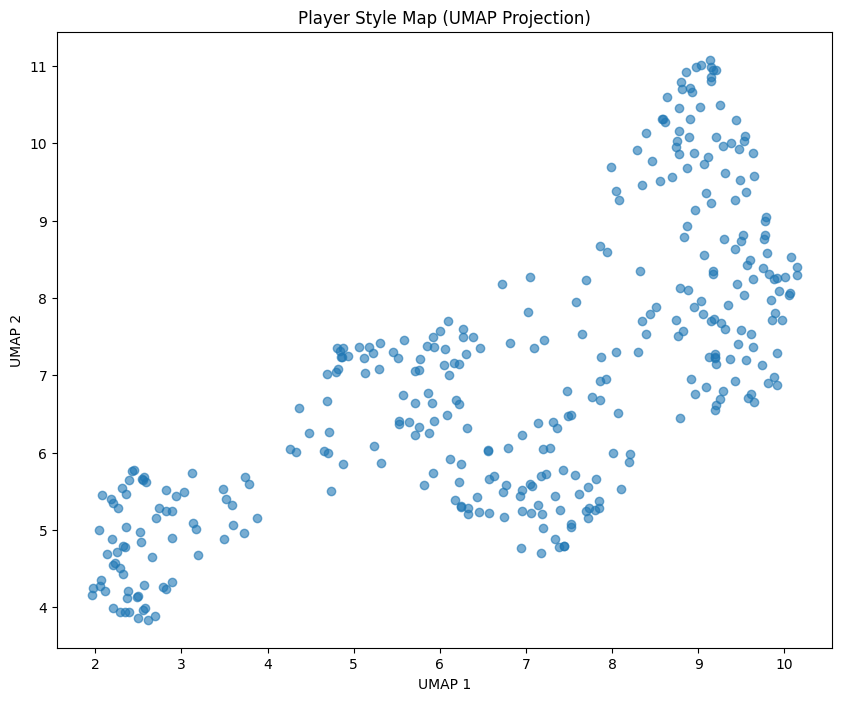

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(per90_stats['umap_x'], per90_stats['umap_y'], alpha=0.6)
plt.title('Player Style Map (UMAP Projection)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


In [26]:
from sklearn.mixture import GaussianMixture

gmm_level1 = GaussianMixture(n_components=7, random_state=42)
level1_clusters = gmm_level1.fit_predict(X_scaled)

per90_stats['main_cluster'] = level1_clusters
per90_stats['sub_cluster'] = 0
per90_stats['role'] = 0

cluster_counter = 0
for main_cluster_id in range(7):
    cluster_mask = level1_clusters == main_cluster_id
    cluster_data = X_scaled[cluster_mask]
    
    if len(cluster_data) > 1:
        gmm_level2 = GaussianMixture(n_components=2, random_state=42)
        sub_clusters = gmm_level2.fit_predict(cluster_data)
        
        per90_stats.loc[cluster_mask, 'sub_cluster'] = sub_clusters
        
        for sub_id in range(2):
            sub_mask = cluster_mask & (per90_stats['sub_cluster'] == sub_id)
            per90_stats.loc[sub_mask, 'role'] = cluster_counter
            cluster_counter += 1
    else:
        per90_stats.loc[cluster_mask, 'role'] = cluster_counter
        cluster_counter += 1


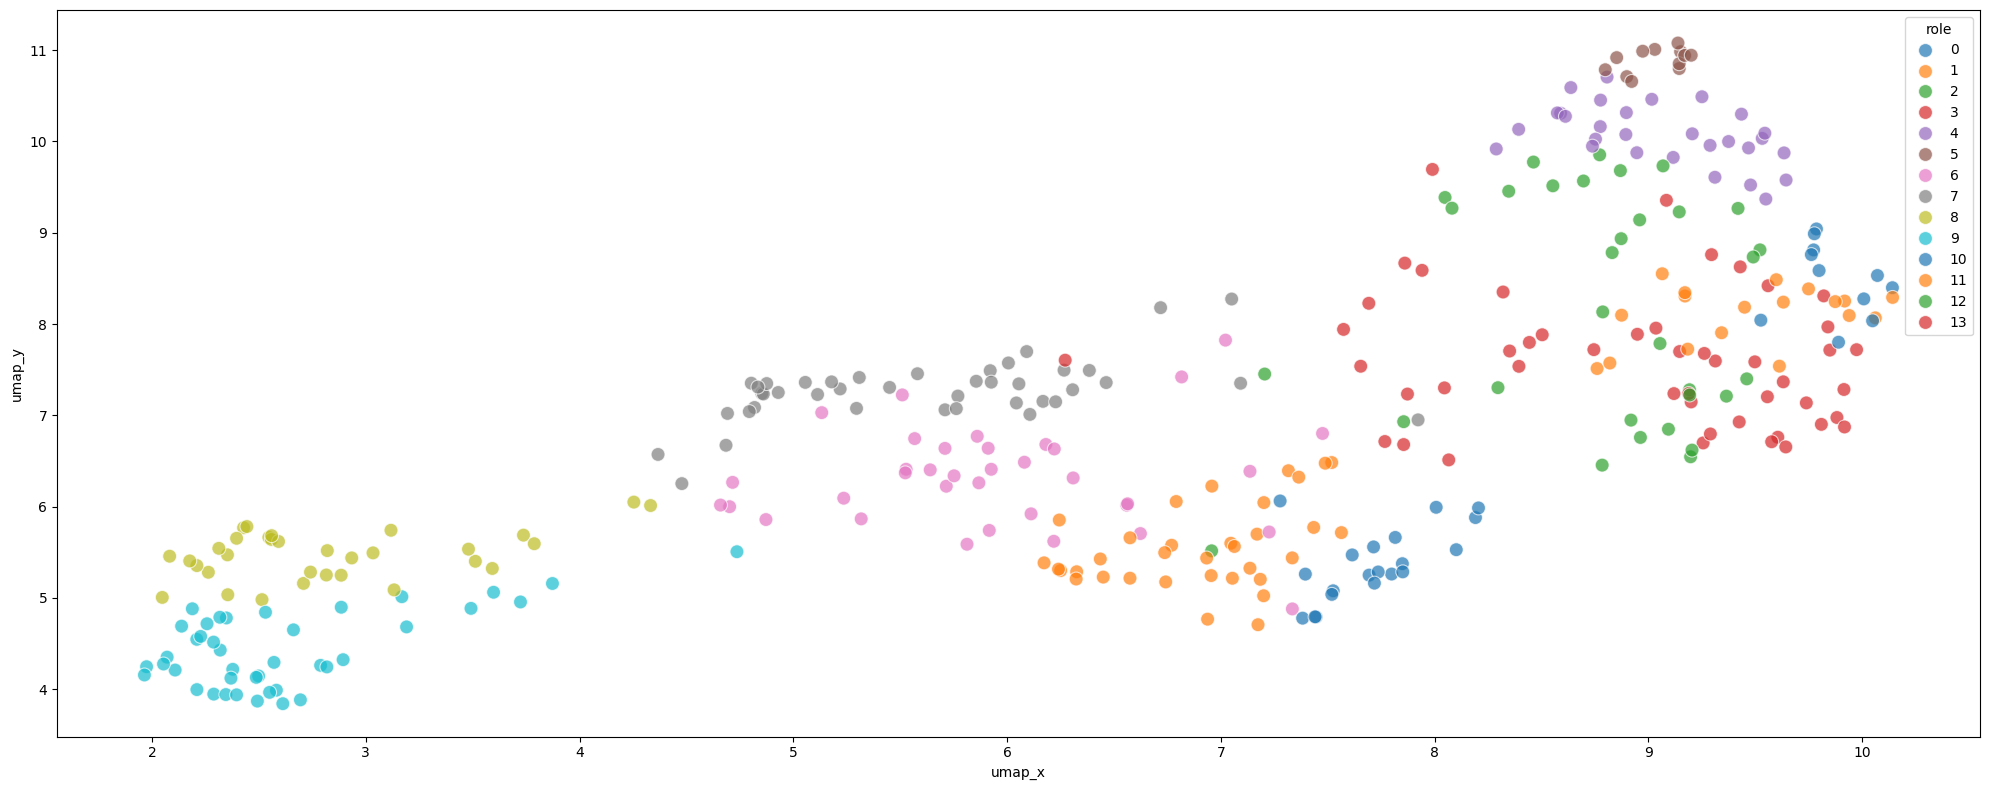

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(1, 1, figsize=(20, 8))

sns.scatterplot(
    data=per90_stats,
    x='umap_x',
    y='umap_y',
    hue='role',
    palette='tab10',
    alpha=0.7,
    s=100,
    ax=ax1
)

ax2.set_title('14 groups clusters', fontsize=14)
ax2.set_xlabel('UMAP 1')
ax2.set_ylabel('UMAP 2')

plt.tight_layout()
plt.show()


In [30]:
print("=== Main clusters statistics ===")
main_cluster_summary = per90_stats.groupby('main_cluster')[features].mean().round(2)
display(main_cluster_summary)

print("\n=== Role statistics ===")
role_summary = per90_stats.groupby('role')[features].mean().round(2)
display(role_summary)

print("\n=== Analysis of differences between sub-clusters ===")
for main_cluster in range(7):
    subset = per90_stats[per90_stats['main_cluster'] == main_cluster]
    roles_in_cluster = sorted(subset['role'].unique())
    
    if len(roles_in_cluster) > 1:
        print(f"\nMain cluster {main_cluster} (roles {roles_in_cluster[0]} and {roles_in_cluster[1]}):")
        
        role1_stats = subset[subset['role'] == roles_in_cluster[0]][features].mean()
        role2_stats = subset[subset['role'] == roles_in_cluster[1]][features].mean()
        
        diff = abs(role1_stats - role2_stats).sort_values(ascending=False)
        print(f"  Top 3 differences:")
        for i, (feature, diff_val) in enumerate(diff.head(3).items()):
            val1 = role1_stats[feature]
            val2 = role2_stats[feature]
            print(f"    {i+1}. {feature}: {val1:.2f} vs {val2:.2f} (difference: {diff_val:.2f})")
    else:
        print(f"\nMain cluster {main_cluster}: only one role {roles_in_cluster[0]}")


=== Main clusters statistics ===


,passes /90,shots /90,xG /90,carries /90,assists_for_shots /90,through_balls /90,duels_won /90,interceptions /90,counterpresses /90,assists_for_goals /90,all_dribbles /90,successful_dribbles /90,headers /90,clearances /90,crosses /90,cut_backs /90,pass_accuracy %
main_cluster,,,,,,,,,,,,,,,,,
0,55.40,0.95,0.07,43.59,0.76,0.25,1.95,1.30,8.80,0.05,1.50,1.01,0.08,1.94,0.50,0.03,82.94
1,52.91,2.13,0.20,48.56,1.82,0.58,1.05,0.62,6.40,0.24,3.44,2.01,0.11,0.66,2.10,0.21,77.61
2,27.10,2.82,0.40,24.29,0.90,0.17,0.54,0.24,4.49,0.10,2.14,1.15,0.75,0.86,0.73,0.12,70.43
3,53.00,0.61,0.04,35.20,0.72,0.10,1.30,1.05,5.28,0.07,1.35,0.75,0.04,3.11,2.06,0.12,75.13
4,40.77,0.48,0.05,26.45,0.16,0.06,0.95,1.13,3.47,0.01,0.35,0.26,0.27,6.69,0.18,0.01,79.62
5,36.55,2.03,0.15,39.29,1.18,0.21,0.98,0.73,5.92,0.11,4.46,2.58,0.11,0.79,2.68,0.31,71.69
6,37.56,1.87,0.18,32.94,1.01,0.21,0.91,0.56,6.12,0.09,2.19,1.13,0.24,1.00,1.20,0.10,76.01



=== Role statistics ===


,passes /90,shots /90,xG /90,carries /90,assists_for_shots /90,through_balls /90,duels_won /90,interceptions /90,counterpresses /90,assists_for_goals /90,all_dribbles /90,successful_dribbles /90,headers /90,clearances /90,crosses /90,cut_backs /90,pass_accuracy %
role,,,,,,,,,,,,,,,,,
0,64.78,1.09,0.08,52.76,0.93,0.31,2.22,1.29,9.92,0.05,1.88,1.27,0.07,1.82,0.68,0.05,84.26
1,49.88,0.87,0.06,38.20,0.66,0.21,1.78,1.31,8.14,0.04,1.28,0.86,0.09,2.01,0.40,0.01,82.16
2,59.89,2.45,0.22,53.27,1.52,0.80,1.12,0.64,6.56,0.17,3.17,1.86,0.17,0.77,1.16,0.14,81.29
3,49.89,1.99,0.20,46.53,1.95,0.48,1.02,0.61,6.33,0.27,3.55,2.08,0.08,0.61,2.51,0.24,76.02
4,26.61,2.66,0.39,25.48,0.93,0.15,0.50,0.25,4.59,0.09,2.39,1.30,0.50,0.75,0.80,0.14,71.56
5,28.30,3.23,0.44,21.42,0.82,0.22,0.63,0.22,4.26,0.13,1.53,0.79,1.36,1.13,0.56,0.08,67.71
6,53.83,0.63,0.04,35.66,0.68,0.12,1.63,1.21,6.03,0.05,1.05,0.62,0.04,3.10,1.50,0.07,77.24
7,52.27,0.60,0.03,34.80,0.76,0.09,1.00,0.91,4.63,0.09,1.60,0.86,0.05,3.11,2.54,0.16,73.28
8,33.30,0.45,0.05,19.22,0.14,0.06,0.91,0.99,3.33,0.01,0.34,0.25,0.26,7.03,0.26,0.02,73.74



=== Analysis of differences between sub-clusters ===

Main cluster 0 (roles 0 and 1):
  Top 3 differences:
    1. passes /90: 64.78 vs 49.88 (difference: 14.90)
    2. carries /90: 52.76 vs 38.20 (difference: 14.56)
    3. pass_accuracy %: 84.27 vs 82.16 (difference: 2.11)

Main cluster 1 (roles 2 and 3):
  Top 3 differences:
    1. passes /90: 59.89 vs 49.89 (difference: 10.00)
    2. carries /90: 53.27 vs 46.53 (difference: 6.74)
    3. pass_accuracy %: 81.29 vs 76.02 (difference: 5.27)

Main cluster 2 (roles 4 and 5):
  Top 3 differences:
    1. carries /90: 25.48 vs 21.42 (difference: 4.06)
    2. pass_accuracy %: 71.56 vs 67.71 (difference: 3.85)
    3. passes /90: 26.61 vs 28.30 (difference: 1.69)

Main cluster 3 (roles 6 and 7):
  Top 3 differences:
    1. pass_accuracy %: 77.24 vs 73.28 (difference: 3.96)
    2. passes /90: 53.83 vs 52.27 (difference: 1.56)
    3. counterpresses /90: 6.03 vs 4.63 (difference: 1.41)

Main cluster 4 (roles 8 and 9):
  Top 3 differences:
    1. p